### This notebook does some preprocessing while it demonstrates the data mismatch

In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing

attributes_gbs_1 = ['gh03_08','gh08_03','gh04_01','gh05_01','pt04',
                    'pt03_01','pt01_02','gh07_01','gh04_01','gh03_10','gh03_07','gh03_13','gh03_11']
attributes_gbs_2 = ['v2673_1_bfi_bfi1','v2673_1_bfi_bfi2','v2673_1_bfi_bfi3','v2673_1_bfi_bfi4','v2673_1_bfi_bfi5',
                    'v2673_1_bfi_bfi6','v2673_1_bfi_bfi7','v2673_1_bfi_bfi8','v2673_1_bfi_bfi9','v2673_1_bfi_bfi10']

attributes_gesis = ['bazb021a','bazb024a','bazb026a','bazb020a','bbzc017a','bbzc019a','bdap101a','bbak098a','bbal119a','bbal123a','bbal133a','bbal134a','bbal138a',
                    'bdze001a','bdze002a','bdze003a','bdze004a','bdze005a','bdze006a','bdze007a','bdze008a','bdze009a','bdze010a']

attribute_name_1 = ['Schlechter Schlaf','Leben genießen','Zu Nichts aufraffen','Alles anstrengend','Wahlteilnahme','Wahlabsicht',
                    'Desinteresse Politiker','Zufriedenheit Leben','Aktiv','Verärgert','Wach','Nervös','Ängstlich']
attribute_name_2 = ['Zurueckhaltend','leicht Vertrauen','Faulheit','Entspannt','wenig kuenstlerisches Interesse','Gesellig',
                    'Andere kritisieren','Gruendlich','Nervoes','Phantasievoll']
att = attribute_name_1 + attribute_name_2

gesis = pd.read_csv('ZA5665_a1_ba-bf_v22-0-0.dta.csv',engine='python',usecols=attributes_gesis)
gesis.rename(index=str, columns={k:v for k,v in zip(attributes_gesis, att)},inplace=True)

gbs_1 = pd.read_csv('data_merged.csv', usecols=attributes_gbs_1)
gbs_2 = pd.read_csv('gbs_bfi_lev.csv', usecols=attributes_gbs_2)

gbs = pd.concat([gbs_1, gbs_2], axis=1, join='inner')

gbs.rename(index=str, columns={k:v for k,v in zip(attributes_gbs_1+attributes_gbs_2,att)}, inplace=True)

miss_map = {
    'Unit nonresponse':np.nan,
    'Not in panel':np.nan,
    'Item nonresponse':np.nan,
    'Not reached':np.nan,
    'Ambiguous answer':np.nan,
    'keine Angabe':np.nan,
}

gesis = gesis.replace({'10 Äußerst zufrieden':10,
                       '0 Äußerst unzufrieden':0,
                       '1 Stimme gar nicht zu':1,
                       '6 Stimme völlig zu':6
                      }).replace(miss_map)

def domath(x):
    if(x<2.5):
        return 0
    if(x>=2.5):
        return 1

gbs['Wahlabsicht'] = [0.5 if pd.isna(i) else domath(i) for i in gbs.Wahlabsicht]

gesis['Zufriedenheit Leben'] = pd.to_numeric(gesis['Zufriedenheit Leben'], errors='coerce')
gesis['Zufriedenheit Leben'] = gesis.apply(lambda row: 0.4*(row['Zufriedenheit Leben']), axis=1)

gesis['Desinteresse Politiker'] = pd.to_numeric(gesis['Desinteresse Politiker'], errors='coerce')
gesis['Desinteresse Politiker'] = gesis.apply(lambda row: min(5,(row['Desinteresse Politiker'])), axis=1)

gbs['Umfrage'] = 'GBS'
gesis['Umfrage'] = 'GESIS'

df = pd.concat([gbs,gesis])

df = df.replace({
    '5 Trifft voll und ganz zu':5,
    '4 Eher zutreffend':4,
    '3 Weder noch':3,
    '2 Trifft eher nicht zu':2,
    '1 Trifft überhaupt nicht zu':1,
    
    'trifft voll und ganz zu (5)':5,
    'eher zutreffend (4)':4,
    'weder noch (3)':3,     
    'trifft eher nicht zu (2)':2,
    'trifft ueberhaupt nicht zu (1)':1, 
    
    'Unit nonresponse':np.nan,
    'Not in panel':np.nan,
    'Item nonresponse':np.nan,
    'Not reached':np.nan,
    'Ambiguous answer':np.nan,
    'keine Angabe':np.nan,
     
    -1:np.nan,
    -9:np.nan
})

map_political = {
     True:1,
     False:0,
    'Ja':1,
    'Nein':0,
    'True':1,
    'False':0,
    
    'Ja, ich würde wählen.':1,
    'Weiß ich nicht':0.5,
    'Ich war nicht wahlberechtigt.':0.5,
    'Ich bin nicht wahlberechtigt.':0.5,
    'Ich war nicht wahlberechtigt':0.5,
    'Ja, ich würde wählen.':1,
    'Nein, ich würde nicht wählen.':0,
    
    'Nie':1,
    'Fast nie':2,
    'Manchmal':3,
    'Meistens':4,
    'Fast Immer':4,
    'Fast immer':4,
    'Immer':4,
    
    'Gar nicht':1,
    'Ein bisschen':2,
    'Einigermaßen':3,
    'Äußerst':4,
    'Erheblich':4
}


df = df.replace(map_political)
df= df.fillna(df.mean())

y = pd.DataFrame(df['Umfrage'].values)
df.drop('Umfrage',axis=1,inplace=True)

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df[att].values)

X = pd.DataFrame(scaled_df)

In [8]:
df.columns

Index(['Aktiv', 'Alles anstrengend', 'Andere kritisieren',
       'Desinteresse Politiker', 'Entspannt', 'Faulheit', 'Gesellig',
       'Gruendlich', 'Leben genießen', 'Nervoes', 'Nervös', 'Phantasievoll',
       'Schlechter Schlaf', 'Verärgert', 'Wach', 'Wahlabsicht',
       'Wahlteilnahme', 'Zu Nichts aufraffen', 'Zufriedenheit Leben',
       'Zurueckhaltend', 'leicht Vertrauen', 'wenig kuenstlerisches Interesse',
       'Ängstlich'],
      dtype='object')

In [9]:
for c in gbs.columns:
    print(gbs[c].value_counts())
    print(gesis[c].value_counts())

 4.0    311
 3.0    183
 2.0     66
 1.0     14
-9.0      1
-1.0      1
Name: Wach, dtype: int64
Einigermaßen    1697
Erheblich       1389
Ein bisschen     467
Äußerst          367
Gar nicht        184
Name: Wach, dtype: int64
 3.0    255
 4.0    215
 2.0     84
 1.0     21
-9.0      1
Name: Schlechter Schlaf, dtype: int64
Manchmal      1587
Fast nie      1043
Meistens       601
Nie            560
Fast immer     319
Immer          125
Name: Schlechter Schlaf, dtype: int64
 4.0    259
 3.0    243
 2.0     69
 1.0      4
-9.0      1
Name: Verärgert, dtype: int64
Ein bisschen    1893
Gar nicht       1265
Einigermaßen     604
Erheblich        280
Äußerst           71
Name: Verärgert, dtype: int64
 4.0    457
 3.0    102
 2.0     14
 1.0      1
-9.0      1
-1.0      1
Name: Ängstlich, dtype: int64
Gar nicht       2123
Ein bisschen    1465
Einigermaßen     311
Erheblich        159
Äußerst           55
Name: Ängstlich, dtype: int64
 4.0    305
 3.0    217
 2.0     48
 1.0      4
-1.0      1
-

[]

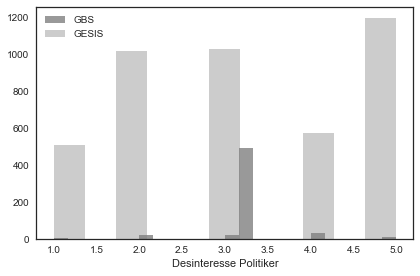

In [6]:
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)

sns.despine(left=True)

# Plot a filled kernel density estimate
sns.distplot(df.head(578)['Desinteresse Politiker'], kde=False, color="black", label="GBS")
sns.distplot(df.tail(4310)['Desinteresse Politiker'], kde=False, color="grey", label="GESIS")

plt.legend()
plt.tight_layout()
plt.plot()

[]

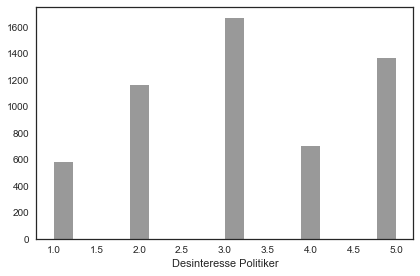

In [64]:
# Plot a filled kernel density estimate
sns.distplot(df['Desinteresse Politiker'], kde=False, color="black")

plt.tight_layout()
plt.plot()

# TODO: PLOT ALL FOUR MAPPING VERSIONS AND BOOTSTRAP SAMPLES FROM GESIS

In [41]:
X.rename(columns={k:v for k,v in zip(X.columns, att)}, inplace=True)
y.rename(columns={k:v for k,v in zip(y.columns, 'Umfrage')}, inplace=True)

X.to_csv('X_red.csv', sep=',', header=True, index=False, encoding='utf-8')
y.to_csv('y_red.csv', sep=',', header=True, index=False, encoding='utf-8')

X.head(5)

,Schlechter Schlaf,Leben genießen,Zu Nichts aufraffen,Alles anstrengend,Wahlteilnahme,Wahlabsicht,Desinteresse Politiker,Zufriedenheit Leben,Aktiv,Verärgert,...,Zurueckhaltend,leicht Vertrauen,Faulheit,Entspannt,wenig kuenstlerisches Interesse,Gesellig,Andere kritisieren,Gruendlich,Nervoes,Phantasievoll
0,0.333333,0.333333,0.434916,0.666667,0.866883,1.0,0.370201,0.50,0.333333,0.333333,...,0.25,0.75,0.25,0.25,0.00,1.00,0.75,0.75,0.50,1.00
1,0.333333,0.333333,0.434916,0.666667,1.000000,0.5,0.370201,0.50,0.333333,0.666667,...,0.50,0.50,0.25,0.25,0.00,0.75,0.25,1.00,0.00,1.00
2,1.000000,0.666667,0.434916,0.333333,0.866883,1.0,0.370201,0.50,0.666667,1.000000,...,0.75,0.75,0.75,0.50,0.75,0.25,0.25,0.75,0.50,0.75
3,1.000000,0.666667,0.434916,0.333333,1.000000,0.5,0.370201,0.75,0.666667,1.000000,...,0.75,0.75,0.25,0.75,0.75,0.25,0.50,0.75,0.25,0.50
4,0.666667,0.666667,0.434916,0.333333,0.866883,1.0,1.000000,0.75,0.666667,1.000000,...,0.25,1.00,0.25,0.75,0.25,0.75,0.25,1.00,0.25,1.00
